In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint


from sklearn.model_selection import train_test_split

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
df = pd.read_csv("kkbox_cleaned_dataset.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
# df.drop(["registered_via", "city", "gender", "membership_days"], axis=1, inplace=True)
targets = df.pop('target')
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,bd,song_length,genre_ids,language,isrc,freq_song_playback,freq_listening_repeatitively,contain_two_others
0,7719,52187,2.0,4.0,2.0,2.890372,12.237920,3.0,52.0,50208,100.0,2411.0,1.0
1,16363,155609,1.0,1.0,1.0,3.218876,12.558787,3.0,52.0,156539,1.0,414.0,0.0
2,16363,84269,1.0,1.0,1.0,3.218876,12.325619,3.0,52.0,202075,2.0,414.0,0.0
3,16363,16644,1.0,1.0,1.0,3.218876,12.451029,3.0,1.0,50496,1.0,414.0,0.0
4,7719,23335,2.0,4.0,2.0,2.890372,12.143149,3.0,52.0,104378,142.0,2411.0,1.0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(df, targets, test_size=0.25, random_state=42)

In [4]:
model = Sequential()
model.add(BatchNormalization(input_shape=(df.shape[1],)))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 13)                52        
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3061 (11.96 KB)
Trainable params: 3035 (11.86 KB)
Non-trainable params: 26 (104.00 Byte)
_________________________________________________________________


2024-02-20 17:00:49.986667: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-20 17:00:49.986998: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-20 17:00:49.987174: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [5]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model_weights/best_model_weights.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min')

In [6]:
history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stopping, checkpoint])

Epoch 1/10


2024-02-20 17:00:51.987757: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-20 17:00:52.762862: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fbd9c372050 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-20 17:00:52.762886: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2024-02-20 17:00:52.768638: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-20 17:00:52.783991: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1708423252.865177   10533 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


135114/135114 [==============================] - 395s 3ms/step - loss: 0.4693 - accuracy: 0.7513 - val_loss: 0.4570 - val_accuracy: 0.7585
Epoch 2/10
135114/135114 [==============================] - 392s 3ms/step - loss: 0.4637 - accuracy: 0.7539 - val_loss: 0.4569 - val_accuracy: 0.7585
Epoch 3/10
135114/135114 [==============================] - 392s 3ms/step - loss: 0.4630 - accuracy: 0.7541 - val_loss: 0.4557 - val_accuracy: 0.7597
Epoch 4/10
135114/135114 [==============================] - 393s 3ms/step - loss: 0.4627 - accuracy: 0.7546 - val_loss: 0.4598 - val_accuracy: 0.7591
Epoch 5/10
135114/135114 [==============================] - 393s 3ms/step - loss: 0.4625 - accuracy: 0.7545 - val_loss: 0.4618 - val_accuracy: 0.7601
Epoch 6/10
135114/135114 [==============================] - 398s 3ms/step - loss: 0.4625 - accuracy: 0.7546 - val_loss: 0.4636 - val_accuracy: 0.7601
Epoch 7/10
135114/135114 [==============================] - 433s 3ms/step - loss: 0.4624 - accuracy: 0.7546 - v

In [7]:
model.save("models/tensorflow_model.h5")

/home/raychannudam/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
from keras.models import load_model
loaded_model = load_model('models/tensorflow_model.h5')
predictions = loaded_model.predict(X_test)

45038/45038 [==============================] - 43s 963us/step


Optimal Threshold: 0.50943786
Accuracy with Optimal Threshold: 0.7594967010382241
Confusion Matrix:
[[523087 182054]
 [164562 571508]]


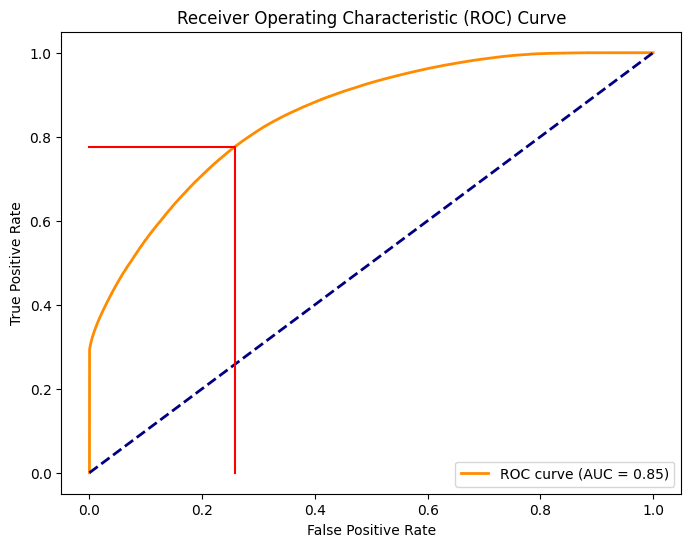

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
y_pred = predictions
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
# Get am optimal thresdhold
optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_index]

selected_tpr = tpr[optimal_threshold_index]
selected_fpr = fpr[optimal_threshold_index]

plt.plot([0, selected_fpr, selected_fpr], [selected_tpr, selected_tpr, 0], color="red")
print('Optimal Threshold:', optimal_threshold)
# Apply the optimal threshold to make predictions
y_pred_optimal_threshold = (y_pred >= optimal_threshold).astype(int)
# Calculate and print accuracy with the optimal threshold
accuracy_optimal_threshold = accuracy_score(y_test, y_pred_optimal_threshold)
print('Accuracy with Optimal Threshold:', accuracy_optimal_threshold)
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_optimal_threshold)
print('Confusion Matrix:')
print(conf_matrix)

plt.show()